In [231]:
import pandas as pd

In [232]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [233]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [235]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [236]:
df.shape

(133349, 11)

In [237]:
linhas, colunas = df.shape[0], df.shape[1]
print("Linhas:", linhas)
print("Colunas:", colunas)

Linhas: 133349
Colunas: 11


In [238]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [239]:
renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'localizacao',
    'company_size': 'tamanho'
}

df.rename(columns=renomear_colunas, inplace=True)
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'localizacao', 'tamanho'],
      dtype='object')

In [240]:
senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df["senioridade"] = df["senioridade"].replace(senioridade)
df["senioridade"].value_counts()

senioridade
Senior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: count, dtype: int64

In [241]:
contrato =  {
    'FT': 'Integral',
    'CT': 'Contrato',
    'PT': 'Meio Periodo',
    'FL': 'Freelancer',
}

df["contrato"] = df["contrato"].replace(contrato)
df["contrato"].value_counts()

contrato
Integral        132563
Contrato           394
Meio Periodo       376
Freelancer          16
Name: count, dtype: int64

In [242]:
remoto = {
    0: 'Presencial',
    100: 'Remoto',
    50: 'Hibrido'
}


df["remoto"] = df["remoto"].replace(remoto)
df["remoto"].value_counts()

remoto
Presencial    105312
Remoto         27718
Hibrido          319
Name: count, dtype: int64

In [243]:
tamanho = {
    'M': 'Media',
    'L': 'Grande',
    'S': 'Pequena'
}

df["tamanho"] = df["tamanho"].replace(tamanho)
df["tamanho"].value_counts()

tamanho
Media      129561
Grande       3574
Pequena       214
Name: count, dtype: int64

In [244]:
cargo = {
    "Data Scientist": "Cientista De Dados",
    "Software Engineer": "Engenheiro De Software",
    "Data Engineer": "Engenheiro De Dados",
    "Data Analyst": "Analista De Dados",
    "Engineer": "Engenheiro",
    "Deep Learning Researcher": "Pesquisador Em Deep Lerning",
    "Marketing Data Engineer": "Engenheiro de Dados de Marketing",
    "Data Science Tech Lead": "Líder Técnico(a) de Ciência de Dados",
    "Principal Data Architect": "Arquiteto(a) Principal de Dados",     
    "Cloud Data Architect": "Arquiteto(a) de Dados em Nuvem",
    "Solutions Engineer": "Engenheiro De Soluções",
}  

df["cargo"] = df["cargo"].replace(cargo)
df["cargo"].value_counts()

cargo
Cientista De Dados                      17314
Engenheiro De Software                  15007
Engenheiro De Dados                     14868
Analista De Dados                       12381
Engenheiro                               9456
                                        ...  
Quantitative Research Analyst               1
Líder Técnico(a) de Ciência de Dados        1
Staff Machine Learning Engineer             1
Arquiteto(a) Principal de Dados             1
Arquiteto(a) de Dados em Nuvem              1
Name: count, Length: 390, dtype: int64

In [245]:
df.head(10)

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho
0,2025.0,Senior,Integral,Engenheiro De Soluções,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Engenheiro De Soluções,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Engenheiro De Dados,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Engenheiro De Dados,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Engenheiro De Dados,90000,USD,90000,US,Presencial,US,Media
5,2025.0,Junior,Integral,Engenheiro De Dados,80000,USD,80000,US,Presencial,US,Media
6,2025.0,Senior,Integral,Cientista De Dados,185000,USD,185000,US,Presencial,US,Media
7,2025.0,Senior,Integral,Cientista De Dados,148000,USD,148000,US,Presencial,US,Media
8,2025.0,Pleno,Integral,Cientista De Dados,135000,USD,135000,CA,Presencial,CA,Media
9,2025.0,Pleno,Integral,Cientista De Dados,108000,USD,108000,CA,Presencial,CA,Media


In [246]:
df.describe(include="object")

,senioridade,contrato,cargo,moeda,residencia,remoto,localizacao,tamanho
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Integral,Cientista De Dados,USD,US,Presencial,US,Media
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [247]:
# Aula 2

In [248]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [249]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho
0,2025.0,Senior,Integral,Engenheiro De Soluções,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Engenheiro De Soluções,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Engenheiro De Dados,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Engenheiro De Dados,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Engenheiro De Dados,90000,USD,90000,US,Presencial,US,Media


In [250]:
df.isnull().sum()

ano            10
senioridade     0
contrato        0
cargo           0
salario         0
moeda           0
usd             0
residencia      0
remoto          0
localizacao     0
tamanho         0
dtype: int64

In [251]:
# Valores unicos na coluna "Ano"
df["ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [252]:
# Tabela com os valores NULLs
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho
5588,NaN,Senior,Integral,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,Pleno,Integral,Engenheiro,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,Junior,Integral,Cientista De Dados,208800,USD,208800,US,Presencial,US,Media
59759,NaN,Senior,Integral,Engenheiro De Software,135000,USD,135000,US,Presencial,US,Media
59789,NaN,Senior,Integral,Engenheiro,112000,USD,112000,US,Presencial,US,Media
131000,NaN,Senior,Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,Senior,Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,Junior,Integral,Cientista De Dados,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Integral,Cientista De Dados,130000,USD,130000,US,Hibrido,US,Grande


In [253]:
# Importação da biblioteca numpy
import numpy as np

# Criação de um DataFrame de teste para usar de exemplo
df_salarios = pd.DataFrame({
    'nome': ['Nikolev', 'Hugo', 'Daniel', 'Nina', "Maria"],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

# Calcula a media e substitui os nulos pela média e arredonda os valores
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

# Calcula a mediana e substitui os nulos pela mediana
df_salarios['salario_mediano'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediano
0,Nikolev,4000.0,4000.00,4000.0
1,Hugo,NaN,36333.33,5000.0
2,Daniel,5000.0,5000.00,5000.0
3,Nina,NaN,36333.33,5000.0
4,Maria,100000.0,100000.00,100000.0


In [254]:
df_temperaturas = pd.DataFrame({

    'dia': ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    'temperatura': [30, np.nan, np.nan, 28, 27]

})

df_temperaturas['preenchido_ffill'] = df_temperaturas["temperatura"].ffill()
df_temperaturas

,dia,temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [255]:
df_temperaturas = pd.DataFrame({

    'dia': ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    'temperatura': [30, np.nan, np.nan, 28, 27]

})

df_temperaturas['preenchido_bfill'] = df_temperaturas["temperatura"].bfill()
df_temperaturas

,dia,temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [256]:
df_cidades = pd.DataFrame({

    'nome': ['Nikolev', 'Hugo', 'Daniel', 'Nina', "Maria"],
    'cidade': ['Belém', np.nan, 'São Paulo', np.nan, 'Rio De Janeiro']
    
})

df_cidades['cidade_preenchida'] = df_cidades["cidade"].fillna('Não Informado')
df_cidades

,nome,cidade,cidade_preenchida
0,Nikolev,Belém,Belém
1,Hugo,NaN,Não Informado
2,Daniel,São Paulo,São Paulo
3,Nina,NaN,Não Informado
4,Maria,Rio De Janeiro,Rio De Janeiro


In [257]:
df_limpo = df.dropna()

In [258]:
df_limpo.isnull().sum()

ano            0
senioridade    0
contrato       0
cargo          0
salario        0
moeda          0
usd            0
residencia     0
remoto         0
localizacao    0
tamanho        0
dtype: int64

In [259]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho
0,2025.0,Senior,Integral,Engenheiro De Soluções,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Engenheiro De Soluções,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Engenheiro De Dados,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Engenheiro De Dados,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Engenheiro De Dados,90000,USD,90000,US,Presencial,US,Media


In [260]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ano          133339 non-null  float64
 1   senioridade  133339 non-null  object 
 2   contrato     133339 non-null  object 
 3   cargo        133339 non-null  object 
 4   salario      133339 non-null  int64  
 5   moeda        133339 non-null  object 
 6   usd          133339 non-null  int64  
 7   residencia   133339 non-null  object 
 8   remoto       133339 non-null  object 
 9   localizacao  133339 non-null  object 
 10  tamanho      133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [261]:
df_limpo = df_limpo.assign(Ano = df_limpo['ano'].astype('int64'))
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho,Ano
0,2025.0,Senior,Integral,Engenheiro De Soluções,214000,USD,214000,US,Remoto,US,Media,2025
1,2025.0,Senior,Integral,Engenheiro De Soluções,136000,USD,136000,US,Remoto,US,Media,2025
2,2025.0,Pleno,Integral,Engenheiro De Dados,158800,USD,158800,AU,Presencial,AU,Media,2025
3,2025.0,Pleno,Integral,Engenheiro De Dados,139200,USD,139200,AU,Presencial,AU,Media,2025
4,2025.0,Junior,Integral,Engenheiro De Dados,90000,USD,90000,US,Presencial,US,Media,2025


In [262]:
# Aula 3

In [263]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho,Ano
0,2025.0,Senior,Integral,Engenheiro De Soluções,214000,USD,214000,US,Remoto,US,Media,2025
1,2025.0,Senior,Integral,Engenheiro De Soluções,136000,USD,136000,US,Remoto,US,Media,2025
2,2025.0,Pleno,Integral,Engenheiro De Dados,158800,USD,158800,AU,Presencial,AU,Media,2025
3,2025.0,Pleno,Integral,Engenheiro De Dados,139200,USD,139200,AU,Presencial,AU,Media,2025
4,2025.0,Junior,Integral,Engenheiro De Dados,90000,USD,90000,US,Presencial,US,Media,2025


<Axes: title={'center': 'Distruibuição De Senioridade'}, xlabel='senioridade'>

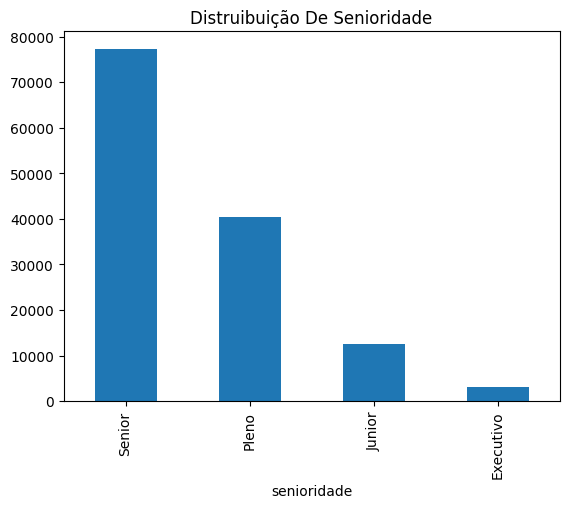

In [264]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distruibuição De Senioridade')

In [265]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

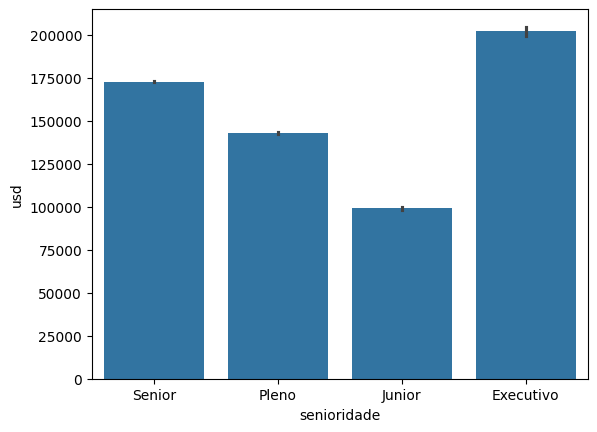

In [266]:
sns.barplot(df_limpo, x='senioridade', y='usd')

In [267]:
import matplotlib.pyplot as plt

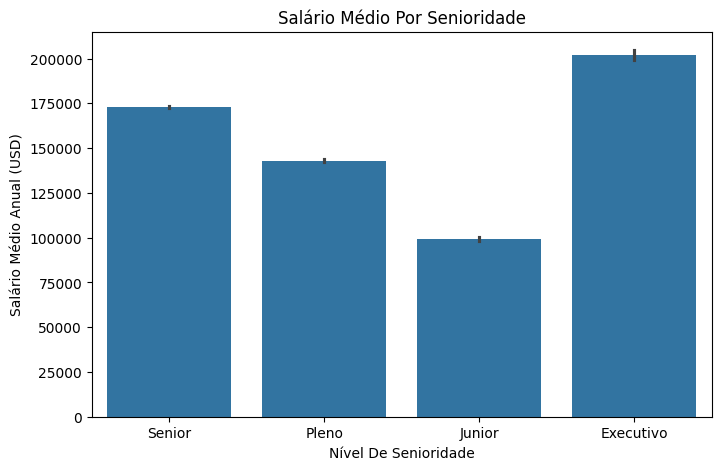

In [268]:
plt.figure(figsize=(8, 5))
sns.barplot(df_limpo, x='senioridade', y='usd')
plt.title("Salário Médio Por Senioridade")
plt.xlabel("Nível De Senioridade")
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

In [269]:
df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False)

senioridade
Executivo    202027.667813
Senior       172850.838301
Pleno        143044.845979
Junior        99034.963267
Name: usd, dtype: float64

In [270]:
ordem = df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=True).index
ordem

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='senioridade')

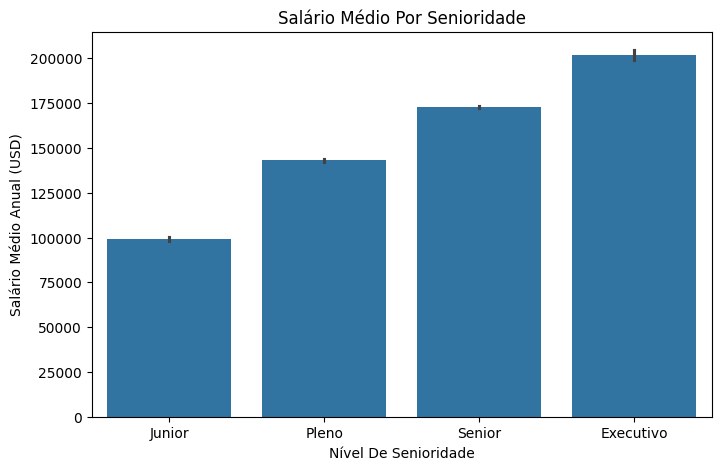

In [271]:
plt.figure(figsize=(8, 5))
sns.barplot(df_limpo, x='senioridade', y='usd', order=ordem)
plt.title("Salário Médio Por Senioridade")
plt.xlabel("Nível De Senioridade")
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

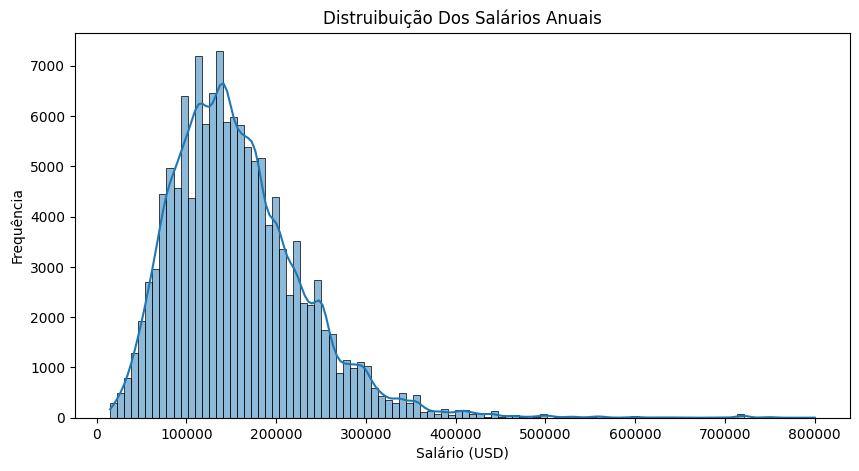

In [272]:
plt.figure(figsize=(10, 5))
sns.histplot(df_limpo["usd"], bins=100, kde=True)
plt.title("Distruibuição Dos Salários Anuais")
plt.xlabel("Salário (USD)")
plt.ylabel('Frequência')
plt.show()

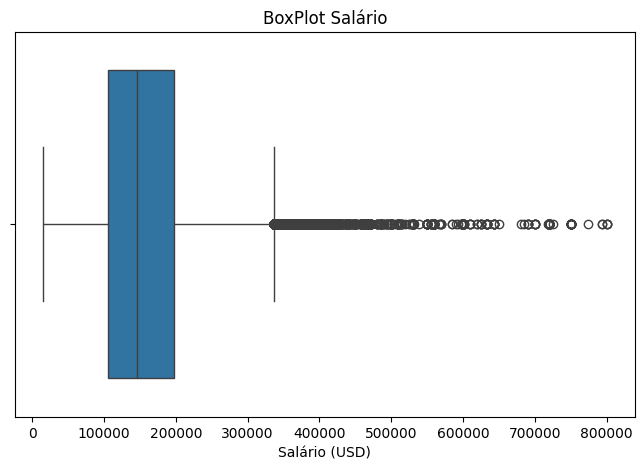

In [273]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_limpo['usd'])
plt.title("BoxPlot Salário")
plt.xlabel("Salário (USD)")
plt.show()

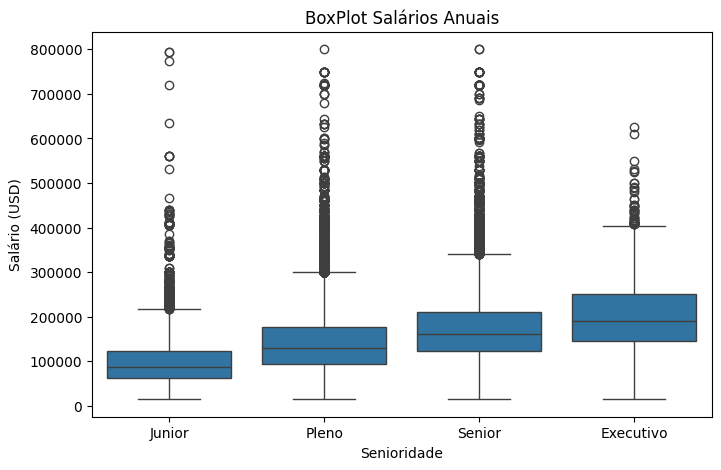

In [274]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade',  y='usd', data=df_limpo, order=ordem_senioridade)
plt.title("BoxPlot Salários Anuais")
plt.xlabel("Senioridade")
plt.ylabel("Salário (USD)")
plt.show()

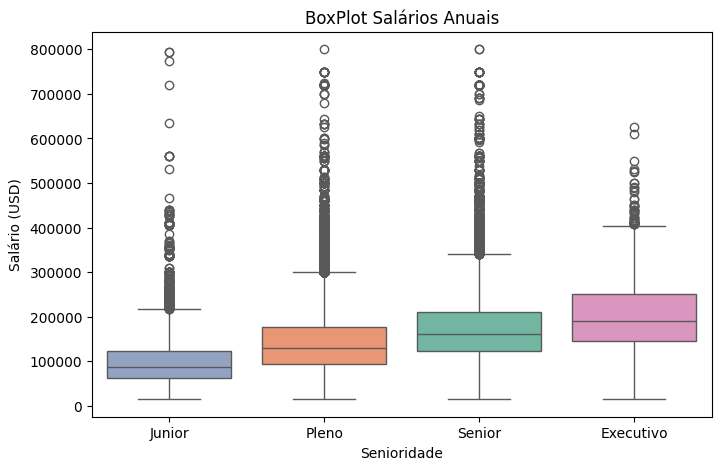

In [275]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade',  y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue="senioridade")
plt.title("BoxPlot Salários Anuais")
plt.xlabel("Senioridade")
plt.ylabel("Salário (USD)")
plt.show()

In [276]:
import plotly.express as px

In [277]:
# Calcular a média salarial por senioridade
media_salario_senioridade = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).reset_index()

# Criar gráfico de barras
fig = px.bar(media_salario_senioridade,
    x="senioridade",
    y="usd",
    labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'},
    title='Média Salarial por Senioridade',
)
fig.show()

In [278]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']


# Criar gráfico de barras
fig = px.pie(remoto_contagem,
    names='tipo_trabalho',
    values='quantidade',
    title='Proporção de tipos de trabalho'
)
fig.show()

In [279]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']


# Criar gráfico de barras
fig = px.pie(remoto_contagem,
    names='tipo_trabalho',
    values='quantidade',
    title='Proporção de tipos de trabalho',
    hole=0.5

)
fig.show()

In [280]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
    names='tipo_trabalho',
    values='quantidade',
    title='Proporção de tipos de trabalho',
    hole=0.5
)

fig.update_traces(textinfo='percent+label')

fig.show()

In [281]:
# Desafio

In [282]:
cientista = 'Cientista De Dados'

df_limpo_cargo = df_limpo[df_limpo['cargo'] == cientista]

media_salario_pais = df_limpo_cargo.groupby('residencia')['usd'].mean().sort_values(ascending=True).reset_index()

fig = px.bar(media_salario_pais,
    x="residencia",
    y="usd",
    color='residencia',
    labels={'residencia': 'País', 'usd': 'Média Salarial Anual (USD)'},
    title='Média salarial de cientista de dados por pais ',
)
fig.show()